In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

In [85]:
with np.load("notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]

In [86]:
print(trainData.shape,validData.shape,testData.shape)
#print(type(testData))
#print(testTarget[2])

(3500, 28, 28) (100, 28, 28) (145, 28, 28)


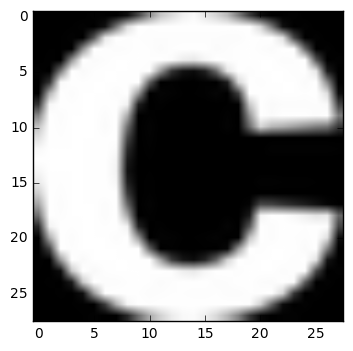

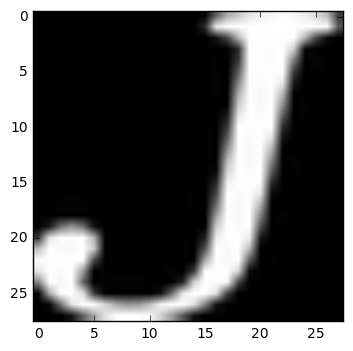

In [87]:
plt.figure()
plt.imshow(testData[0],cmap='gray')

plt.figure()
plt.imshow(testData[2],cmap='gray')

In [88]:
#flatten the 2D features to 1D
trainData=np.reshape(trainData, [3500, 28*28]) 
validData=np.reshape(validData, [100, 28*28]) 
testData=np.reshape(testData, [145, 28*28]) 

print(trainData.shape,validData.shape,testData.shape)
#print(type(testData))
#print(testTarget[2])

(3500, 784) (100, 784) (145, 784)


In [89]:
w = tf.Variable(tf.truncated_normal([28*28, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
#w = tf.Variable(tf.zeros([28*28, 1], dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

decay_lambda = 0

def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    loss = (tf.reduce_mean(tf.square(y - predictions)))/2 + decay_lambda/2*(tf.reduce_sum(tf.square(w)))
    return [ predictions, loss ]

In [90]:
X_ = tf.placeholder(dtype=tf.float64,shape=[None, 28*28])
y_ = tf.placeholder(dtype=tf.float64,shape=[None, 1])
mini_batch_size = 500

#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)

predicted_trainTarget, cost = calc(X_, y_)
# Feel free to tweak these values:
learning_rate = 0.005


In [91]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train=optimizer.minimize(cost)
init = tf.global_variables_initializer()

1 Linear Regression [10 points]
    1. Tuning the learning rate [4 pts]:

In [41]:
points = [[], []]
learning_rate = 0.005

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            points[1].append(c)

points_1 = points #store the results when learning_rate = 0.005 into points_1

In [42]:
points = [[], []]
learning_rate = 0.001

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            points[1].append(c)

points_2 = points #store the results when learning_rate = 0.001 into points_2

In [43]:
points = [[], []]
learning_rate = 0.0001

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            #points[1].append(sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]}))
            points[1].append(c)

points_3 = points #store the results when learning_rate = 0.0001 into points_3

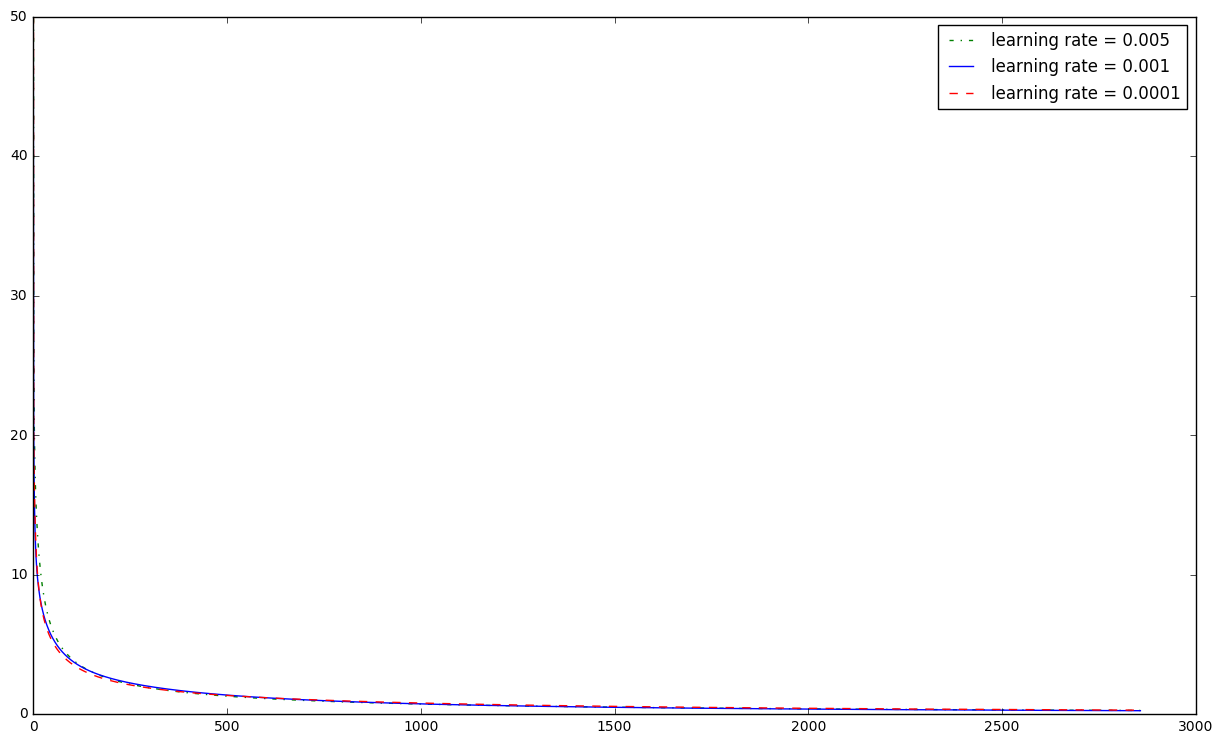

In [54]:
plt.figure(figsize=(15,9))
plt.plot(points_1[0], points_1[1], 'g-.', label="learning rate = 0.005")
plt.plot(points_2[0], points_2[1], 'b', label="learning rate = 0.001")
plt.plot(points_3[0], points_3[1], 'r--', label="learning rate = 0.0001")
plt.legend()
plt.ylim(0.00,50)
plt.show()

1 Linear Regression [10 points]
    2. Effect of the mini-batch size [2 pts]:

In [55]:
learning_rate = 0.001
mini_batch_size = 500
#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)

points_4 = points_2 #store the results when learning_rate = 0.001 and batch size = 500 into points_4
#this training has been done in part1 when batch size = 500 and learning_rate = 0.001 so no need to train it again


In [56]:
learning_rate = 0.001
mini_batch_size = 1500
#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)
points=[[],[]]

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            #points[1].append(sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]}))
            points[1].append(c)

points_5 = points #store the results when learning_rate = 0.001 and batch size = 1500 into points_5

In [57]:
learning_rate = 0.001
mini_batch_size = 3500
#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)
points=[[],[]]

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            #points[1].append(sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]}))
            points[1].append(c)

points_6 = points #store the results when learning_rate = 0.001 and batch size = 3500 into points_6

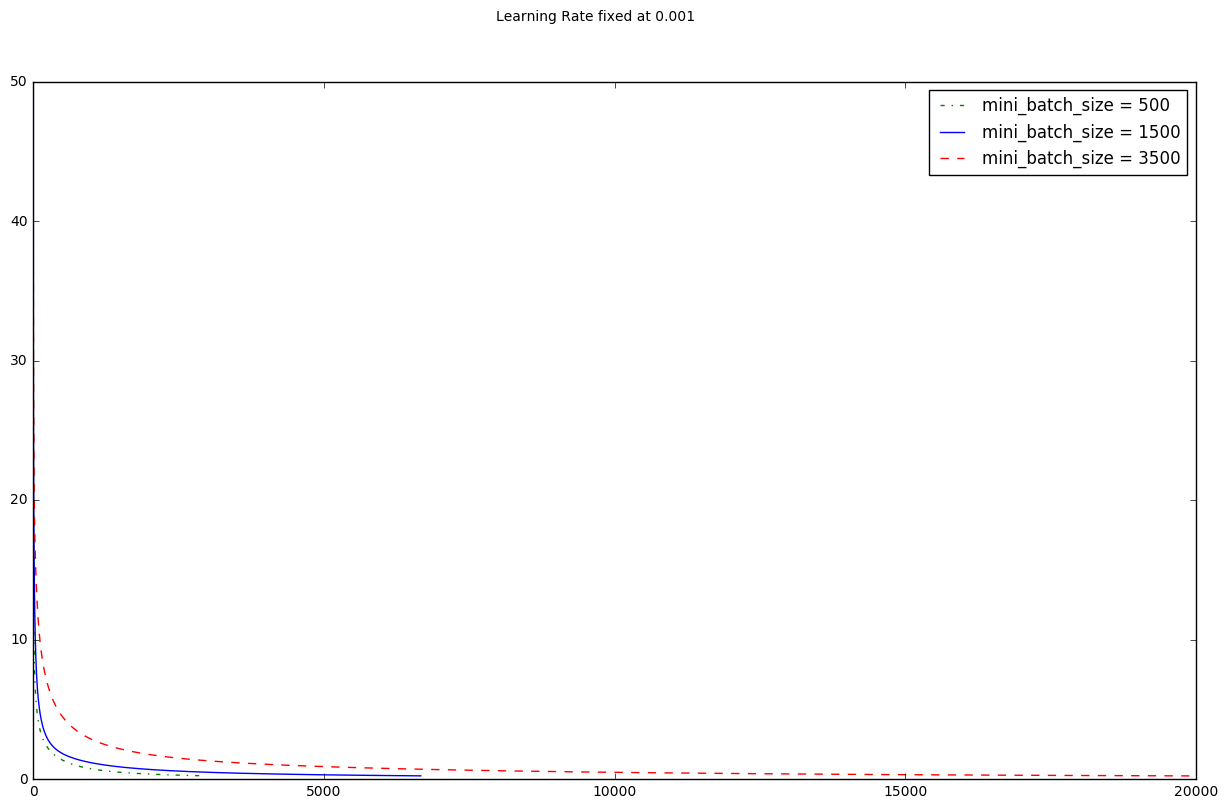

In [65]:
plt.figure(figsize=(15,9))
plt.plot(points_4[0], points_4[1], 'g-.', label="mini_batch_size = 500")
plt.plot(points_5[0], points_5[1], 'b', label="mini_batch_size = 1500")
plt.plot(points_6[0], points_6[1], 'r--', label="mini_batch_size = 3500")
plt.legend()
plt.ylim(0.00,50)
plt.suptitle('Learning Rate fixed at 0.001')
plt.show()

1 Linear Regression [10 points]
    3. Generalization [2 pts]:

In [92]:
learning_rate = 0.005
mini_batch_size = 500
#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)
decay_lambda = 0
points=[[],[]]

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            #points[1].append(sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]}))
            points[1].append(c)
    
    i=0 #index for valid set samples
    s=0 #record correct results
    for sample in validData:
        pred_y = tf.add(b, tf.matmul(tf.expand_dims(sample, 0), w))
        predicted_y = sess.run(pred_y)
        if(predicted_y >= 0.5):
            predicted_y=1
        else:
            predicted_y=0
        if(predicted_y == validTarget[i]):
            s+=1
        i+=1
    print("When lambda = 0, Validation Set Accuracy Rate:",s*(1.0)/i)

When lambda = 0, Validation Set Accuracy Rate: 0.77


In [93]:
learning_rate = 0.005
mini_batch_size = 500
#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)
decay_lambda = 0.001
points=[[],[]]

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            #points[1].append(sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]}))
            points[1].append(c)
    
    i=0 #index for valid set samples
    s=0 #record correct results
    for sample in validData:
        pred_y = tf.add(b, tf.matmul(tf.expand_dims(sample, 0), w))
        predicted_y = sess.run(pred_y)
        if(predicted_y >= 0.5):
            predicted_y=1
        else:
            predicted_y=0
        if(predicted_y == validTarget[i]):
            s+=1
        i+=1
    print("When lambda = 0.001, Validation Set Accuracy Rate:",s*(1.0)/i)

When lambda = 0.001, Validation Set Accuracy Rate: 0.79


In [94]:
learning_rate = 0.005
mini_batch_size = 500
#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)
decay_lambda = 0.1
points=[[],[]]

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            #points[1].append(sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]}))
            points[1].append(c)
    
    i=0 #index for valid set samples
    s=0 #record correct results
    for sample in validData:
        pred_y = tf.add(b, tf.matmul(tf.expand_dims(sample, 0), w))
        predicted_y = sess.run(pred_y)
        if(predicted_y >= 0.5):
            predicted_y=1
        else:
            predicted_y=0
        if(predicted_y == validTarget[i]):
            s+=1
        i+=1
    print("When lambda = 0.1, Validation Set Accuracy Rate:",s*(1.0)/i)

When lambda = 0.1, Validation Set Accuracy Rate: 0.78


In [95]:
learning_rate = 0.005
mini_batch_size = 500
#n_batch denotes number of batches per epoch
n_batch = 3500 // mini_batch_size + (3500 % mini_batch_size != 0)
decay_lambda = 1
points=[[],[]]

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(20000): 
        i_batch = (step % n_batch)*mini_batch_size
        batch = trainData[i_batch:i_batch+mini_batch_size], trainTarget[i_batch:i_batch+mini_batch_size]
        c=sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]})
        sess.run(train, feed_dict={X_: batch[0], y_: batch[1]})
    
        if((step%n_batch)==0):
            points[0].append(step/n_batch)
            #points[1].append(sess.run(cost, feed_dict={X_: batch[0], y_: batch[1]}))
            points[1].append(c)
    
    i=0 #index for valid set samples
    s=0 #record correct results
    for sample in validData:
        pred_y = tf.add(b, tf.matmul(tf.expand_dims(sample, 0), w))
        predicted_y = sess.run(pred_y)
        if(predicted_y >= 0.5):
            predicted_y=1
        else:
            predicted_y=0
        if(predicted_y == validTarget[i]):
            s+=1
        i+=1
    print("When lambda = 1, Validation Set Accuracy Rate:",s*(1.0)/i)

When lambda = 1, Validation Set Accuracy Rate: 0.75
